In [1]:
from MomentumBT import MomentumBT as BT

In [2]:
tester = BT(symbol="EURUSD=X", start = "2018-01-01",end = "2019-12-31", window=3, leverage=7, quantile=0.9, quantile_window=3 )

[*********************100%%**********************]  1 of 1 completed


## Test methods and instantiation

In [3]:
tester.data.head()

,Price,returns,lev_returns,window
Date,,,,
2018-01-01,1.200495,NaN,NaN,NaN
2018-01-02,1.201158,0.000552,0.003860,NaN
2018-01-03,1.206345,0.004309,0.029783,1.202666
2018-01-04,1.201043,-0.004406,-0.031254,1.202849
2018-01-05,1.206884,0.004852,0.033479,1.204757


In [4]:
tester.backtest()

Strategy Net performance: 0.9922 || Strategy outperformance vs Buy and Hold: 0.0652


In [6]:
tester.result

,Price,returns,lev_returns,window,price_diff,mag_pricechange,mag_pcquantile,positions,trades,creturns,clev_returns,strategy,strategy_net,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,,
2018-01-04,1.201043,-0.004406,-0.031254,1.202849,0.000183,0.000152,0.003566,0.0,0.0,0.995604,0.969229,NaN,NaN,NaN,NaN
2018-01-05,1.206884,0.004852,0.033479,1.204757,0.001909,0.001587,0.004755,0.0,0.0,1.000446,1.002227,0.000000,0.000000,1.000000,1.000000
2018-01-08,1.203746,-0.002603,-0.018368,1.203891,-0.000866,0.000719,0.003371,-0.0,0.0,0.997845,0.983986,-0.000000,-0.000000,1.000000,1.000000
2018-01-09,1.197046,-0.005582,-0.039743,1.202559,-0.001332,0.001107,0.003371,-0.0,0.0,0.992291,0.945646,0.000000,0.000000,1.000000,1.000000
2018-01-10,1.192933,-0.003442,-0.024343,1.197908,-0.004650,0.003867,-0.002767,-1.0,1.0,0.988882,0.922904,0.000000,-0.001712,1.000000,0.998290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.109385,0.001264,0.008814,1.109988,-0.000736,0.000662,0.001192,-0.0,1.0,0.919625,0.471123,-0.008814,-0.010526,1.218370,0.998932
2019-12-25,1.109016,-0.000333,-0.002331,1.108795,-0.001193,0.001075,0.000945,-1.0,1.0,0.919319,0.470026,0.000000,-0.001712,1.218370,0.997224
2019-12-26,1.109545,0.000477,0.003335,1.109316,0.000520,0.000469,0.001107,0.0,1.0,0.919758,0.471596,-0.003335,-0.005046,1.214314,0.992204


In [7]:
tester.result.mag_pricechange.max()

0.008629022742842718

In [8]:
tester.result.mag_pricechange.min()

7.498399250849275e-06

In [9]:
tester.result.mag_pricechange.mean() #average magntude

0.0017462371788853216

In [10]:
tester.result.trades.value_counts()

trades
0.0    399
1.0    118
Name: count, dtype: int64

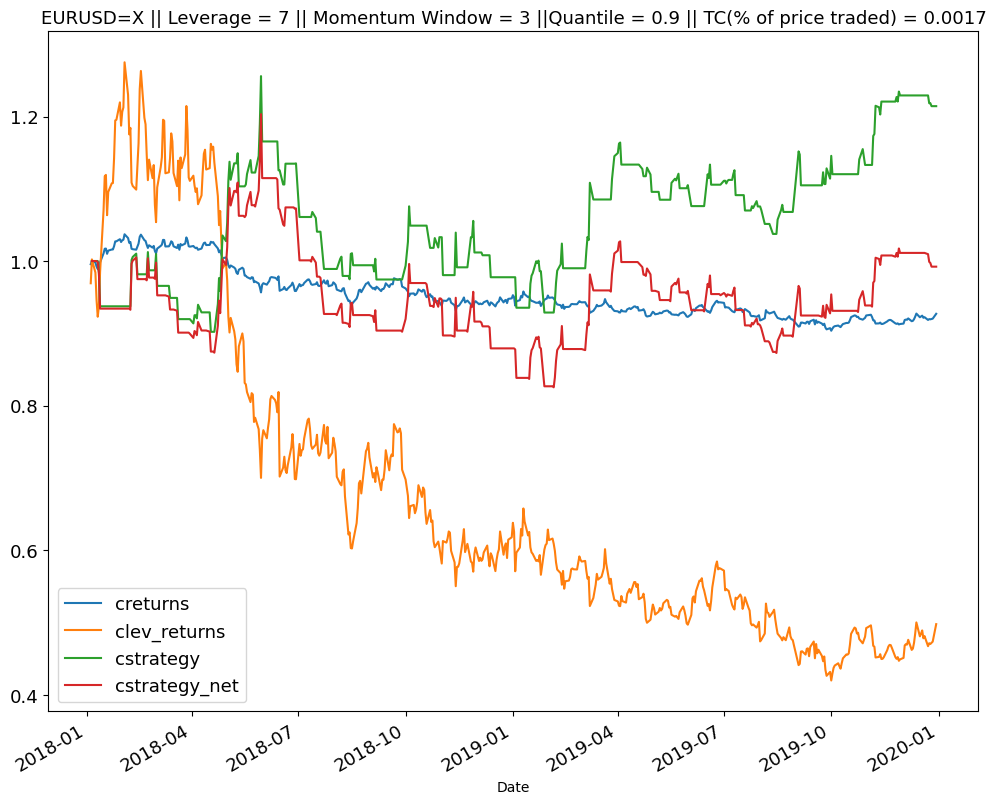

In [11]:
tester.plot_data()

## Test optimisation

In [12]:
tester.optimise_strategy(window_range=5,quantile_window_range=10,qrange = (0.6,1.0,5,False), leverage_range=(2,5))

1000
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Optimal Window : 1 || Quantile Window: 1 ||Quantile : 0.6 || Leverage = 2 || Performance : 1.1373


In [13]:
tester.set_parameters(1,1,0.6,leverage=2)

In [14]:
print(tester)

MomentumBT: EURUSD=X, window = 1,quantile_window =1, quantile = 0.6, leverage = 2


In [15]:
tester.backtest()

Strategy Net performance: 0.9512 || Strategy outperformance vs Buy and Hold: 0.0198


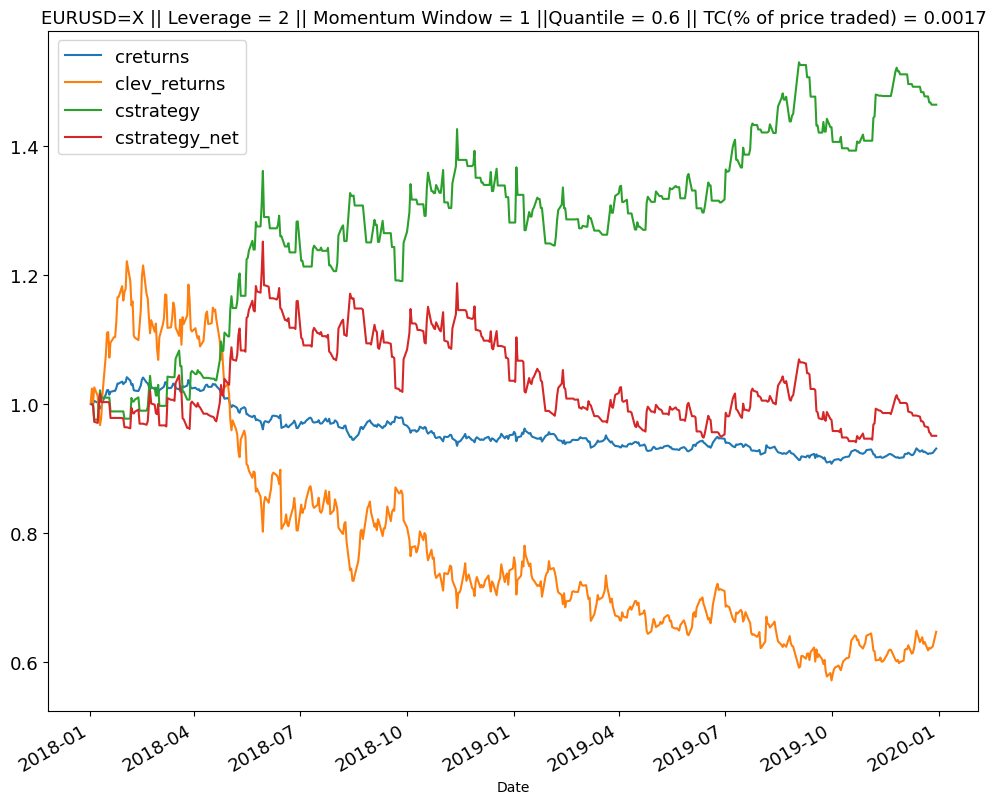

In [16]:
tester.plot_data()

In [17]:
tester.result.trades.value_counts()

trades
0.0    267
1.0    252
Name: count, dtype: int64

In [17]:
tester.optimisation_results.nlargest(10,columns="performance")

,Window,Quantile_Window,Quantile,Leverage,performance
480,5,5,0.70,2,2.0305
0,1,1,0.70,2,1.9510
672,7,4,0.88,2,1.8575
688,7,5,0.82,2,1.8414
668,7,4,0.82,2,1.8004
576,6,4,0.94,2,1.7303
696,7,5,0.94,2,1.6023
483,5,5,0.70,5,1.6000
4,1,1,0.76,2,1.5485
8,1,1,0.82,2,1.5485


## In & Outsample testing

In [18]:
train = BT("EURUSD=X", start="2017-01-01", end = "2019-12-31", window = 5,quantile_window=5, quantile=0.7, leverage=2)

[*********************100%%**********************]  1 of 1 completed


In [19]:
train

MomentumBT: EURUSD=X, window = 5,quantile_window =5, quantile = 0.7, leverage = 2

In [20]:
train.backtest()

Strategy Net performance: 0.6182 || Strategy outperformance vs Buy and Hold: -0.4362


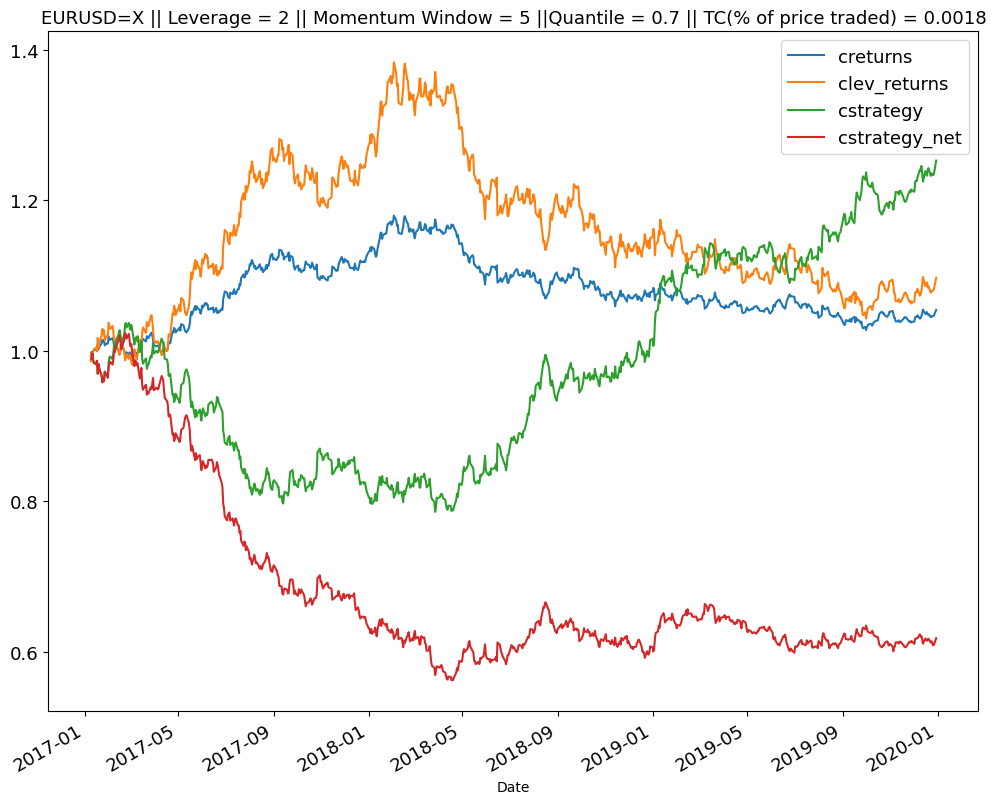

In [21]:
train.plot_data()

In [52]:
train.optimise_strategy(window_range=10,qrange=(0.5,1.0,10,False), leverage_range=(1,10))

Optimal Window : 9 ||Quantile : 0.65 || Leverage = 1 || Performance : 2.7034


In [53]:
train.set_parameters(9,0.65,1)

In [54]:
train.backtest()

Strategy Net performance: 2.7034 || Strategy outperformance vs Buy and Hold: 1.6483


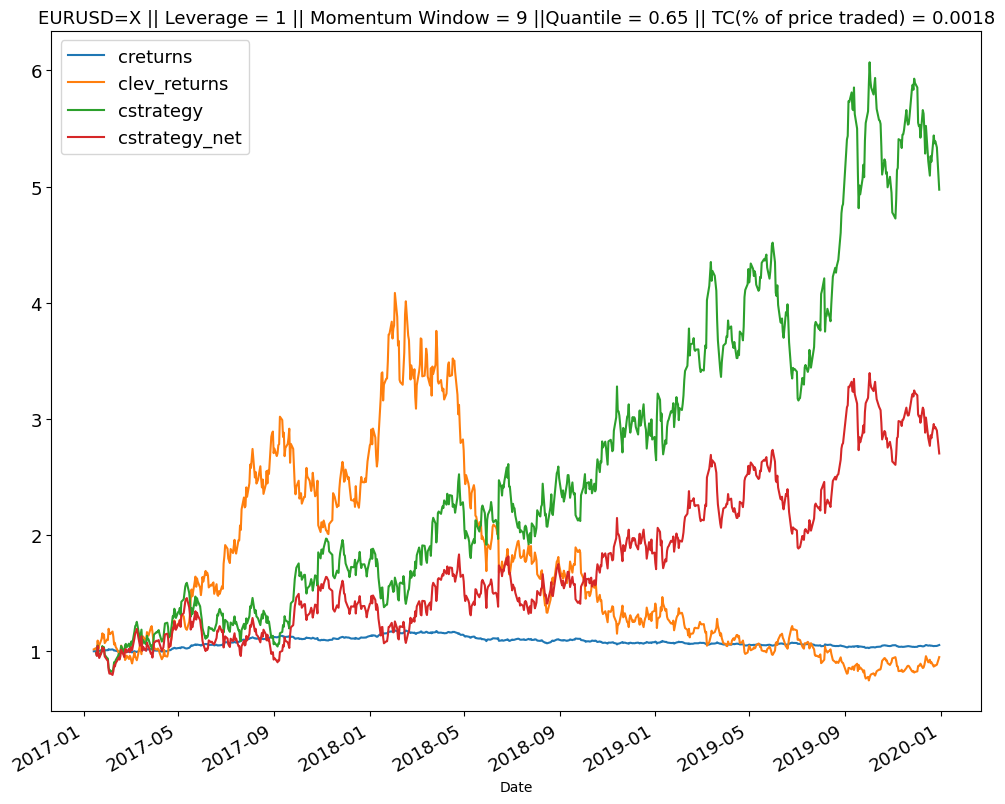

In [55]:
train.plot_data()

In [56]:
test = BT("EURUSD=X", start="2020-01-01", end = "2022-12-31", window = 9, quantile=0.65,leverage=1)

[*********************100%%**********************]  1 of 1 completed


In [57]:
print(test)

MomentumBT: EURUSD=X, window = 9, quantile = 0.65, leverage = 1


In [61]:
test.backtest()

Strategy Net performance: 0.5977 || Strategy outperformance vs Buy and Hold: -0.3613


c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' ins

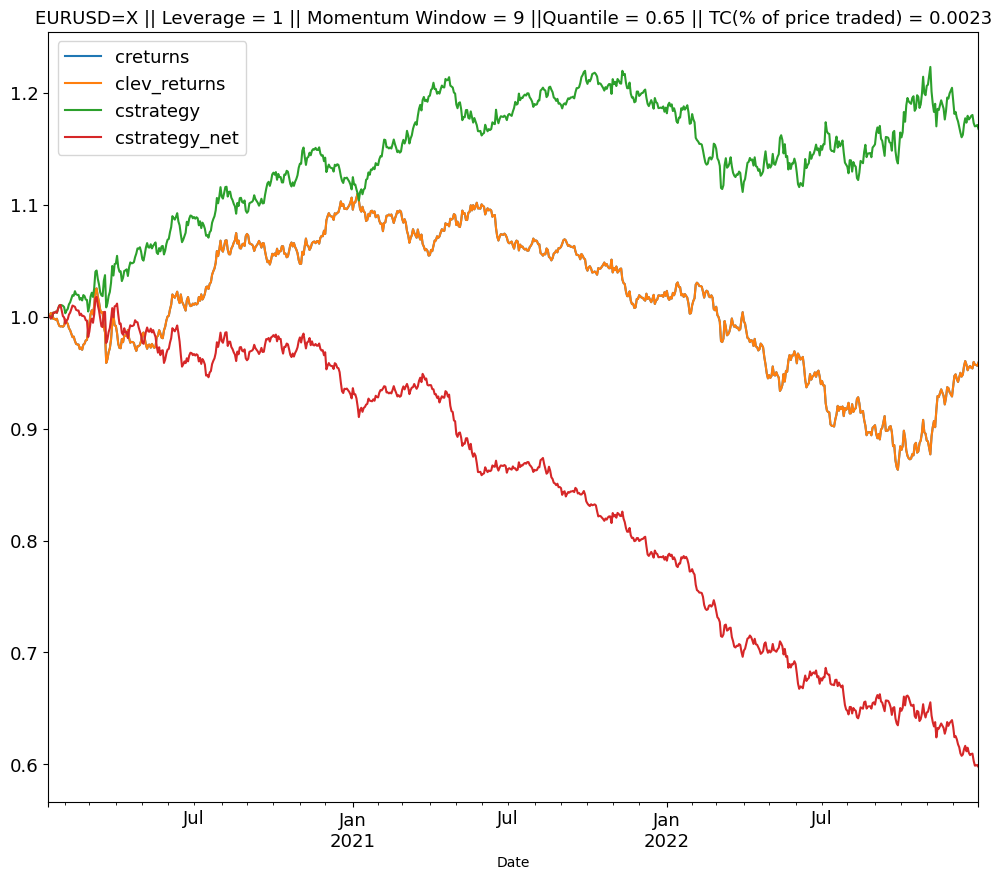

In [62]:
test.plot_data()